In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [8]:
all_genes = pd.read_csv('../../Data/PPG_AT2_RNAseq_covariance_input_filt_0419.tsv',sep='\t')
all_genes.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275


In [10]:
#Data frame containing missing genes
missing_genes = all_genes[all_genes['AT2_04M_F0']==0]
print(f'Numer of missing genes {len(missing_genes)}')
#Data frame containing genes we have
gene_exp = all_genes[all_genes['AT2_04M_F0']!=0]
print(f'Numer of total genes {len(gene_exp)}')

Numer of missing genes 916
Numer of total genes 13118


In [11]:
sal_EnsembleIds_StartEnd = pd.read_csv('../../Data/mart_exports/PPG_WCP/mart_export_mm_gr38_82718.txt',sep='\t',index_col=0)

In [12]:
sal_EnsembleIds_StartEnd.head()

,Gene start (bp),Gene end (bp),Chromosome/scaffold name
Gene stable ID,,,
ENSMUSG00000064372,15356,15422,MT
ENSMUSG00000064371,15289,15355,MT
ENSMUSG00000064370,14145,15288,MT
ENSMUSG00000064369,14071,14139,MT
ENSMUSG00000064368,13552,14070,MT


In [13]:
set(sal_EnsembleIds_StartEnd['Chromosome/scaffold name'])

{'1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'CHR_CAST_EI_MMCHR11_CTG4',
 'CHR_CAST_EI_MMCHR11_CTG5',
 'CHR_MG104_PATCH',
 'CHR_MG117_PATCH',
 'CHR_MG132_PATCH',
 'CHR_MG153_PATCH',
 'CHR_MG171_PATCH',
 'CHR_MG184_PATCH',
 'CHR_MG190_MG3751_PATCH',
 'CHR_MG191_PATCH',
 'CHR_MG209_PATCH',
 'CHR_MG3172_PATCH',
 'CHR_MG3231_PATCH',
 'CHR_MG3251_PATCH',
 'CHR_MG3490_PATCH',
 'CHR_MG3496_PATCH',
 'CHR_MG3530_PATCH',
 'CHR_MG3561_PATCH',
 'CHR_MG3562_PATCH',
 'CHR_MG3609_PATCH',
 'CHR_MG3618_PATCH',
 'CHR_MG3627_PATCH',
 'CHR_MG3648_PATCH',
 'CHR_MG3656_PATCH',
 'CHR_MG3683_PATCH',
 'CHR_MG3686_PATCH',
 'CHR_MG3700_PATCH',
 'CHR_MG3712_PATCH',
 'CHR_MG3714_PATCH',
 'CHR_MG3829_PATCH',
 'CHR_MG3833_MG4220_PATCH',
 'CHR_MG3835_PATCH',
 'CHR_MG3836_PATCH',
 'CHR_MG3999_PATCH',
 'CHR_MG4136_PATCH',
 'CHR_MG4138_PATCH',
 'CHR_MG4151_PATCH',
 'CHR_MG4162_PATCH',
 'CHR_MG4180_PATCH',
 'CHR_MG4198_PATCH',
 'CHR_MG4200_PA

In [15]:
sal_mgi_symbol = pd.read_csv('../../Data/mart_exports/PPG_WCP/mm_genes_anno.txt',sep='\t',index_col=0)

In [16]:
sal_mgi_symbol.head()

,MGI symbol,Gene description
Gene stable ID,,
ENSMUSG00000064336,mt-Tf,mitochondrially encoded tRNA phenylalanine [So...
ENSMUSG00000064337,mt-Rnr1,mitochondrially encoded 12S rRNA [Source:MGI S...
ENSMUSG00000064338,mt-Tv,mitochondrially encoded tRNA valine [Source:MG...
ENSMUSG00000064339,mt-Rnr2,mitochondrially encoded 16S rRNA [Source:MGI S...
ENSMUSG00000064340,mt-Tl1,mitochondrially encoded tRNA leucine 1 [Source...


In [17]:
combined = sal_EnsembleIds_StartEnd.join(sal_mgi_symbol,how='outer')

In [18]:
sal_mgi_symbol.sort_index().head()

,MGI symbol,Gene description
Gene stable ID,,
ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...
ENSMUSG00000000003,Pbsn,probasin [Source:MGI Symbol;Acc:MGI:1860484]
ENSMUSG00000000028,Cdc45,cell division cycle 45 [Source:MGI Symbol;Acc:...
ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript..."
ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2 [Source:MGI ...


In [19]:
sal_EnsembleIds_StartEnd.sort_index().head()

,Gene start (bp),Gene end (bp),Chromosome/scaffold name
Gene stable ID,,,
ENSMUSG00000000001,108107280,108146146,3
ENSMUSG00000000003,77837901,77853623,X
ENSMUSG00000000028,18780447,18811987,16
ENSMUSG00000000031,142575529,142578143,7
ENSMUSG00000000037,161117193,161258213,X


In [22]:
combined.head()

,Gene start (bp),Gene end (bp),Chromosome/scaffold name,MGI symbol,Gene description
Gene stable ID,,,,,
ENSMUSG00000000001,108107280,108146146,3,Gnai3,guanine nucleotide binding protein (G protein)...
ENSMUSG00000000003,77837901,77853623,X,Pbsn,probasin [Source:MGI Symbol;Acc:MGI:1860484]
ENSMUSG00000000028,18780447,18811987,16,Cdc45,cell division cycle 45 [Source:MGI Symbol;Acc:...
ENSMUSG00000000031,142575529,142578143,7,H19,"H19, imprinted maternally expressed transcript..."
ENSMUSG00000000037,161117193,161258213,X,Scml2,Scm polycomb group protein like 2 [Source:MGI ...


In [23]:
len(sal_EnsembleIds_StartEnd)

55029

In [24]:
len(sal_mgi_symbol)

55034

In [25]:
combined.isnull().sum()

Gene start (bp)                0
Gene end (bp)                  0
Chromosome/scaffold name       0
MGI symbol                  1136
Gene description            1048
dtype: int64

In [26]:
np.where(pd.isnull(combined))

(array([17820, 20934, 20934, ..., 55032, 55033, 55033]),
 array([3, 3, 4, ..., 4, 3, 4]))

In [27]:
combined.iloc[17820,:]

Gene start (bp)                                                         15881
Gene end (bp)                                                           36183
Chromosome/scaffold name                                           GL456216.1
MGI symbol                                                                NaN
Gene description            dehydrogenase/reductase (SDR family) X chromos...
Name: ENSMUSG00000063897, dtype: object

In [28]:
sal_EnsembleIds_StartEnd.loc['ENSMUSG00000063897']

Gene start (bp)                  15881
Gene end (bp)                    36183
Chromosome/scaffold name    GL456216.1
Name: ENSMUSG00000063897, dtype: object

In [29]:
sal_mgi_symbol.loc['ENSMUSG00000063897']

MGI symbol                                                        NaN
Gene description    dehydrogenase/reductase (SDR family) X chromos...
Name: ENSMUSG00000063897, dtype: object

In [30]:
combined.iloc[np.where(pd.isnull(combined))[0]].index

Index(['ENSMUSG00000063897', 'ENSMUSG00000074720', 'ENSMUSG00000074720',
       'ENSMUSG00000079190', 'ENSMUSG00000079192', 'ENSMUSG00000079192',
       'ENSMUSG00000079222', 'ENSMUSG00000079222', 'ENSMUSG00000079764',
       'ENSMUSG00000079764',
       ...
       'ENSMUSG00000116995', 'ENSMUSG00000116995', 'ENSMUSG00000116996',
       'ENSMUSG00000116996', 'ENSMUSG00000116997', 'ENSMUSG00000116997',
       'ENSMUSG00000116998', 'ENSMUSG00000116998', 'ENSMUSG00000116999',
       'ENSMUSG00000116999'],
      dtype='object', name='Gene stable ID', length=2184)

In [31]:
#combined.to_csv('Data/mart_exports/PPG_WCP/combined_mgi.tsv',sep = '\t')

In [35]:
removed_null = combined.drop(combined.iloc[np.where(pd.isnull(combined))[0]].index)

In [36]:
removed_null.isnull().sum()

Gene start (bp)             0
Gene end (bp)               0
Chromosome/scaffold name    0
MGI symbol                  0
Gene description            0
dtype: int64

In [37]:
all_genes.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275


In [38]:
removed_null.rename(columns={'MGI symbol':'MGI.symbol'},inplace=True)
removed_null.head()

/gpfs/home/dshak/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Gene start (bp),Gene end (bp),Chromosome/scaffold name,MGI.symbol,Gene description
Gene stable ID,,,,,
ENSMUSG00000000001,108107280,108146146,3,Gnai3,guanine nucleotide binding protein (G protein)...
ENSMUSG00000000003,77837901,77853623,X,Pbsn,probasin [Source:MGI Symbol;Acc:MGI:1860484]
ENSMUSG00000000028,18780447,18811987,16,Cdc45,cell division cycle 45 [Source:MGI Symbol;Acc:...
ENSMUSG00000000031,142575529,142578143,7,H19,"H19, imprinted maternally expressed transcript..."
ENSMUSG00000000037,161117193,161258213,X,Scml2,Scm polycomb group protein like 2 [Source:MGI ...


In [183]:
len(removed_null['MGI.symbol'])

53888

In [184]:
len(set(removed_null['MGI.symbol']))

53160

In [39]:
intersect = pd.merge(all_genes,removed_null,on=['MGI.symbol'])

In [40]:
len(all_genes)

14034

In [41]:
len(intersect)

14224

In [42]:
intersect.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699,108107280,108146146,3,guanine nucleotide binding protein (G protein)...
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571]
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...


In [43]:
len(intersect['MGI.symbol'])

14224

In [44]:
#intersect.to_csv('Data/mart_exports/PPG_WCP/intersect.tsv',sep = '\t')

In [45]:
len(set(intersect['MGI.symbol']))

14033

In [46]:
len(set(all_genes['MGI.symbol']))

14034

In [47]:
set(all_genes['MGI.symbol'])-set(intersect['MGI.symbol'])

{nan}

In [48]:
np.where(intersect.duplicated(subset='MGI.symbol'))

(array([   40,    42,   280,   392,   474,   478,   673,   675,   677,
          705,   710,   783,  1087,  1109,  1298,  1467,  1469,  1471,
         1651,  1653,  1655,  2542,  2544,  2552,  2709,  2724,  2726,
         2728,  2730,  2752,  2754,  2756,  2758,  2760,  2926,  2928,
         3122,  3130,  3148,  3208,  3210,  3297,  3523,  3525,  3527,
         3530,  3554,  3558,  3562,  3568,  3570,  3573,  3576,  3578,
         3584,  3620,  3622,  3624,  3647,  3829,  3831,  3908,  3912,
         3933,  3935,  3937,  3951,  3954,  4146,  4240,  4242,  4286,
         4555,  4838,  5090,  5109,  5113,  5203,  6187,  6244,  6246,
         6434,  6436,  6439,  6442,  6445,  6449,  6784,  6786,  6869,
         7052,  7310,  7426,  7509,  7885,  7890,  7968,  7981,  8022,
         8087,  8099,  8101,  8156,  8196,  8633,  8642,  8699,  8747,
         8754,  8762,  8844,  8909,  8912,  8927,  8963,  8968,  8976,
         9191,  9523,  9916,  9956,  9997, 10231, 10388, 10409, 10475,
      

In [49]:
intersect['MGI.symbol'].iloc[40]

'Arvcf'

In [198]:
intersect['Chromosome/scaffold name']

0                       3
1                      16
2                      11
3                       6
4                      13
5                       4
6                       9
7                      11
8                      17
9                       7
10                      X
11                     11
12                      5
13                      5
14                      7
15                     16
16                     16
17                      9
18                      9
19                      9
20                      6
21                      2
22                     11
23                     11
24                      7
25                     13
26                      X
27                     11
28                     11
29                     11
               ...       
14194                   4
14195                   6
14196                   1
14197    CHR_MG4281_PATCH
14198                   3
14199                  15
14200                   3
14201       

In [50]:
chroms = [str(num) for num in range(20)] + ['X','Y']

In [51]:
chroms

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 'X',
 'Y']

In [52]:
intersect_chroms_only=intersect[intersect['Chromosome/scaffold name'].isin(chroms)]

In [53]:
intersect_chroms_only.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699,108107280,108146146,3,guanine nucleotide binding protein (G protein)...
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571]
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...


In [54]:
#intersect_chroms_only.to_csv('Data/mart_exports/PPG_WCP/intersect_chroms_only.tsv',sep = '\t')

In [55]:
intersect_chroms_only['gene length'] = intersect_chroms_only['Gene end (bp)'] - intersect_chroms_only['Gene start (bp)']

/gpfs/home/dshak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
intersect_chroms_only.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description,gene length
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699,108107280,108146146,3,guanine nucleotide binding protein (G protein)...,38866
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...,31540
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...,18603
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571],7930
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...,8912


In [57]:
len(set(intersect_chroms_only['MGI.symbol']))

14033

In [60]:
chrom_info = pd.read_csv('../../Data/mart_exports/PPG_WCP/ChromosomeLength_MmG38p6.tsv',sep='\t',index_col=0)

In [61]:
chrom_nums = {val: num for num,val in enumerate(chrom_info.index)}

In [62]:
dict(chrom_info['length'])

{'1': 195471971,
 '2': 182113224,
 '3': 160039680,
 '4': 156508116,
 '5': 151834684,
 '6': 149736546,
 '7': 145441459,
 '8': 129401213,
 '9': 124595110,
 '10': 130694993,
 '11': 122082543,
 '12': 120129022,
 '13': 120421639,
 '14': 124902244,
 '15': 104043685,
 '16': 98207768,
 '17': 94987271,
 '18': 90702639,
 '19': 61431566,
 'X': 171031299,
 'Y': 91744698}

In [63]:
chrom_lengths = dict(chrom_info['length'])

In [64]:
intersect_chroms_only.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description,gene length
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699,108107280,108146146,3,guanine nucleotide binding protein (G protein)...,38866
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...,31540
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...,18603
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571],7930
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...,8912


In [65]:
len(all_genes)

14034

In [156]:
len(intersect_chroms_only)

14033

In [48]:
897788/91744698


0.009785720805359237

In [49]:
956786/91744698

0.010428787939331382

In [50]:
((956786+897788)/2)/91744698

0.01010725437234531

In [51]:
print(chrom_lengths)

{'1': 195471971, '2': 182113224, '3': 160039680, '4': 156508116, '5': 151834684, '6': 149736546, '7': 145441459, '8': 129401213, '9': 124595110, '10': 130694993, '11': 122082543, '12': 120129022, '13': 120421639, '14': 124902244, '15': 104043685, '16': 98207768, '17': 94987271, '18': 90702639, '19': 61431566, 'X': 171031299, 'Y': 91744698}


In [52]:
print(chrom_nums)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, 'X': 19, 'Y': 20}


In [53]:
intersect_chroms_only[intersect_chroms_only['Chromosome/scaffold name']=='Y']

,MGI.symbol,AvgChrs,AT2_04M_F0,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description
11037,Kdm5d,20.010107,4.039406,897788,956786,Y,lysine (K)-specific demethylase 5D [Source:MGI...
11887,Uty,20.012767,4.300327,1096861,1245759,Y,ubiquitously transcribed tetratricopeptide rep...
11925,Ddx3y,20.013883,5.809440,1260771,1286629,Y,"DEAD (Asp-Glu-Ala-Asp) box polypeptide 3, Y-li..."
11926,Eif2s3y,20.011114,4.977290,1010543,1028847,Y,"eukaryotic translation initiation factor 2, su..."
13555,Gm47283,20.989710,3.394478,90784738,90816464,Y,"predicted gene, 47283 [Source:MGI Symbol;Acc:M..."
14124,Gm37158,20.181963,3.334389,16691330,16697033,Y,"predicted gene, 37158 [Source:MGI Symbol;Acc:M..."


In [54]:
intersect_chroms_only.head()

,MGI.symbol,AvgChrs,AT2_04M_F0,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description
0,Gnai3,2.675624,7.151432,108107280,108146146,3,guanine nucleotide binding protein (G protein)...
1,Cdc45,15.191392,1.347537,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...
2,Narf,10.993152,4.248040,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...
3,Cav2,5.115437,6.162987,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571]
4,Klf6,12.048712,6.635019,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...


In [70]:
norm_pos = intersect_chroms_only['Chromosome/scaffold name'].map(chrom_nums) + ((intersect_chroms_only['Gene end (bp)'] + intersect_chroms_only['Gene start (bp)'])/2/ intersect_chroms_only['Chromosome/scaffold name'].map(chrom_lengths))

In [73]:
norm_pos.head()

0     2.675624
1    15.191392
2    10.993152
3     5.115437
4    12.048712
dtype: float64

In [74]:
intersect_chroms_only['AvgChrs'].head()

0     2.675624
1    15.191392
2    10.993152
3     5.115437
4    12.048712
Name: AvgChrs, dtype: float64

In [56]:
max(intersect_chroms_only['AvgChrs']-norm_pos)

4.6681716717955624e-05

In [57]:
norm_pos.head()

0     2.675624
1    15.191392
2    10.993152
3     5.115437
4    12.048712
dtype: float64

In [58]:
chrm1 = norm_pos[norm_pos<=1]

In [59]:
chrm1.head()

140    0.186830
141    0.186383
164    0.955304
216    0.621884
330    0.025528
dtype: float64

In [60]:
len(chrm1)

905

Text(0.5, 0, 'Avg chromosome position')

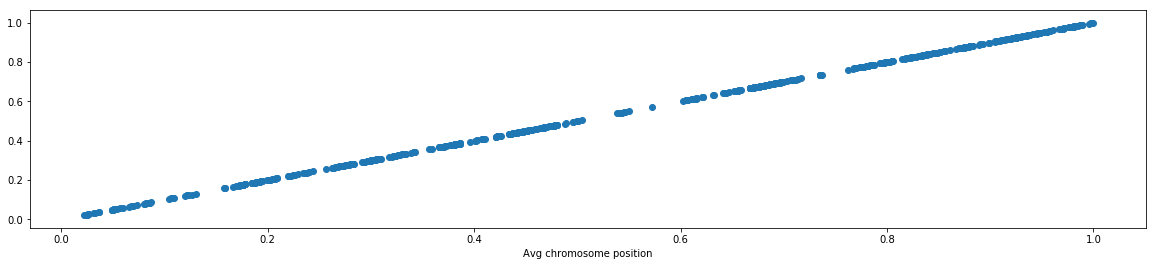

In [61]:
fig1 = plt.figure()
fig1.set_size_inches((20,4))
ax = fig1.add_subplot(111)
ax.scatter(chrm1,chrm1)
ax.set_xlabel("Avg chromosome position")

Text(0.5, 0, 'Avg chromosome position')

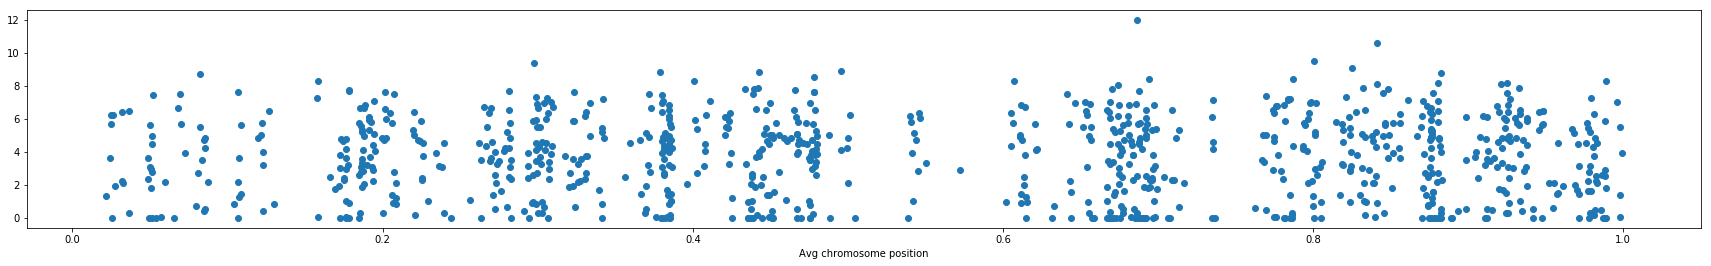

In [62]:
fig1 = plt.figure()
fig1.set_size_inches((30,4))
ax = fig1.add_subplot(111)
ax.scatter(chrm1,intersect_chroms_only['AT2_04M_F0'][norm_pos<=1])
ax.set_xlabel("Avg chromosome position")

Text(0, 0.5, 'rna seq')

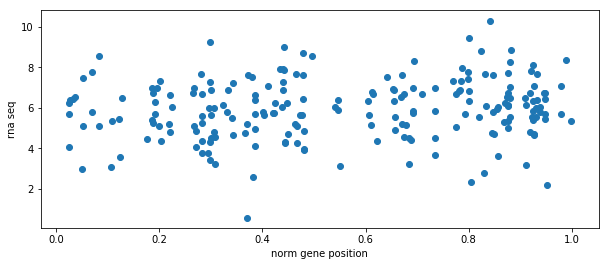

In [65]:
fig1 = plt.figure()
fig1.set_size_inches((10,4))
ax = fig1.add_subplot(111)
ax.scatter(rna_protein['AvgChrs'][rna_protein['AvgChrs']<=1],rna_protein['AT2_18M_F10'][rna_protein['AvgChrs']<=1])
ax.set_xlabel("norm gene position")
ax.set_ylabel("rna seq")

In [66]:
scipy.stats.pearsonr(rna_protein['AvgChrs'][rna_protein['AvgChrs']<=1],rna_protein['AT2_18M_F10'][rna_protein['AvgChrs']<=1])

(0.14345094390332316, 0.038252593701646326)

Text(0.5, 0, 'Avg chromosome position')

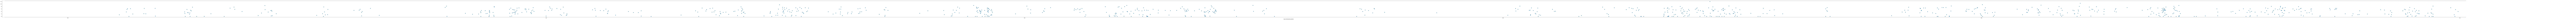

In [67]:
fig1 = plt.figure()
fig1.set_size_inches((600,4))
ax = fig1.add_subplot(111)
ax.scatter(chrm1,intersect_chroms_only['AT2_04M_F0'][norm_pos<=1])
ax.set_xlabel("Avg chromosome position")

In [68]:
scipy.stats.pearsonr(chrm1,intersect_chroms_only['AT2_04M_F0'][norm_pos<=1])

(0.003986851023988496, 0.904663747563399)

In [64]:
rna_protein =  pd.read_csv('Data/VSP_input_AT2_OF_0419.tsv',sep='\t')
rna_protein.head()

,Gene.names,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old
0,0610037L13Rik,RIKEN cDNA 0610037L13 gene,3.689387,4.016506,23.808293
1,1810009A15Rik,RIKEN cDNA 1810009A15 gene,18.144712,0.000000,23.182809
2,2310011J03Rik,RIKEN cDNA 2310011J03 gene,9.614556,4.487340,23.487317
3,2610301B20Rik,RIKEN cDNA 2610301B20 gene,3.069562,4.998258,17.000000
4,2810006K23Rik,RIKEN cDNA 2810006K23 gene,4.818884,1.865742,17.000000


Text(0, 0.5, 'protein level')

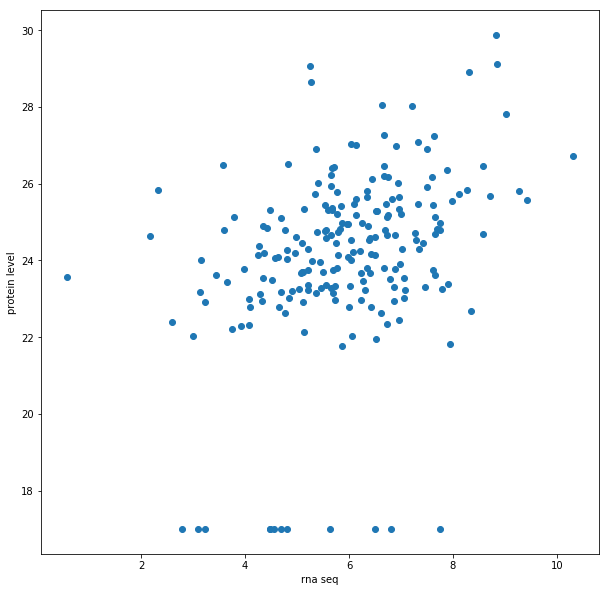

In [69]:
fig1 = plt.figure()
fig1.set_size_inches((10,10))
ax = fig1.add_subplot(111)
ax.scatter(rna_protein['AT2_18M_F10'][rna_protein['AvgChrs']<=1],rna_protein['WSU_Old'][rna_protein['AvgChrs']<=1])
ax.set_xlabel("rna seq")
ax.set_ylabel("protein level")

In [70]:
scipy.stats.pearsonr(rna_protein['AT2_18M_F10'][rna_protein['AvgChrs']<=1],rna_protein['WSU_Old'][rna_protein['AvgChrs']<=1])

(0.3518109045509676, 1.755519024182921e-07)

Text(0, 0.5, 'rna seq')

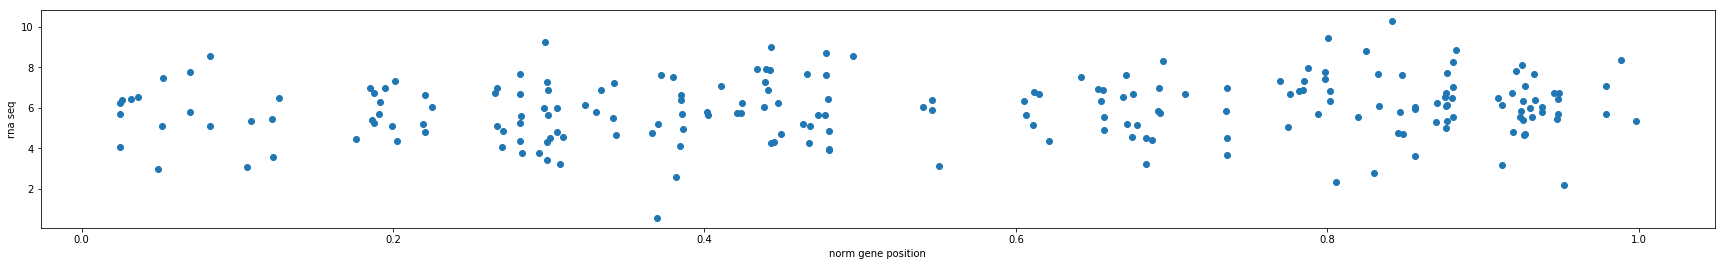

In [71]:
fig1 = plt.figure()
fig1.set_size_inches((30,4))
ax = fig1.add_subplot(111)
ax.scatter(rna_protein['AvgChrs'][rna_protein['AvgChrs']<=1],rna_protein['AT2_18M_F10'][rna_protein['AvgChrs']<=1])
ax.set_xlabel("norm gene position")
ax.set_ylabel("rna seq")

# Try with gene length and with unnormalized rna seq values and proteome values

unormalized is 2^(val) - 12

In [89]:
vsp_input = pd.read_csv('Data/VSP_input_AT2_OF_0419.tsv', sep='\t',index_col=0)
vsp_input.head()

,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old
Gene.names,,,,
0610037L13Rik,RIKEN cDNA 0610037L13 gene,3.689387,4.016506,23.808293
1810009A15Rik,RIKEN cDNA 1810009A15 gene,18.144712,0.000000,23.182809
2310011J03Rik,RIKEN cDNA 2310011J03 gene,9.614556,4.487340,23.487317
2610301B20Rik,RIKEN cDNA 2610301B20 gene,3.069562,4.998258,17.000000
2810006K23Rik,RIKEN cDNA 2810006K23 gene,4.818884,1.865742,17.000000


In [75]:
intersect.head()

,MGI.symbol,AvgChrs,AT2_04M_F0,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description
0,Gnai3,2.675624,7.151432,108107280,108146146,3,guanine nucleotide binding protein (G protein)...
1,Cdc45,15.191392,1.347537,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...
2,Narf,10.993152,4.248040,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...
3,Cav2,5.115437,6.162987,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571]
4,Klf6,12.048712,6.635019,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...


In [77]:
len(intersect)

14224

In [78]:
len(intersect_chroms_only)

14044

In [215]:
intersect_chroms_only = intersect_chroms_only.set_index('MGI.symbol')

In [216]:
intersect_chroms_only[intersect_chroms_only.index.duplicated() == True]

,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description,gene length
MGI.symbol,,,,,,,,,,,
Gcat,glycine C-acetyltransferase (2-amino-3-ketobut...,14.759629,4.370604,4.360897,4.504299,4.328300,79030901,79042531,15,glycine C-acetyltransferase (2-amino-3-ketobut...,11630
Nudt8,Nucleoside diphosphate-linked moiety X motif 8,18.065166,2.546257,2.243965,1.974596,1.251313,4000580,4002103,19,nudix (nucleoside diphosphate linked moiety X)...,1523
Hgs,HGF-regulated tyrosine kinase substrate,10.986839,6.076025,5.805691,5.780017,5.870600,120467635,120483984,11,HGF-regulated tyrosine kinase substrate [Sourc...,16349
Sept2,septin 2,0.478302,7.637620,7.601905,7.463656,7.599219,93478993,93509733,1,septin 2 [Source:NCBI gene;Acc:18000],30740
Dpep2,dipeptidase 2,7.819068,4.115259,3.863962,3.421979,3.395437,105984945,105996423,8,dipeptidase 2 [Source:MGI Symbol;Acc:MGI:2442042],11478
St6galnac2,"ST6 (alpha-N-acetyl-neuraminyl-2,3-beta-galact...",10.955788,6.781071,6.313270,6.938773,6.798824,116677483,116681290,11,"ST6 (alpha-N-acetyl-neuraminyl-2,3-beta-galact...",3807
Zkscan7,zinc finger with KRAB and SCAN domains 7,8.986332,3.515282,2.842217,3.221416,3.415501,122903246,122914154,9,zinc finger with KRAB and SCAN domains 7 [Sour...,10908
4930594M22Rik,RIKEN cDNA 4930594M22 gene,13.984172,1.012113,0.520289,1.726346,1.091367,122952119,122956343,14,RIKEN cDNA 4930594M22 gene [Source:MGI Symbol;...,4224
Tmem147os,"transmembrane protein 147, opposite strand",6.211341,1.883724,1.748485,1.468928,2.395977,30734739,30756126,7,"transmembrane protein 147, opposite strand [So...",21387


In [217]:
intersect_chroms_only.loc['Gcat']

,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description,gene length
MGI.symbol,,,,,,,,,,,
Gcat,glycine C-acetyltransferase (2-amino-3-ketobut...,14.759629,4.370604,4.360897,4.504299,4.3283,79030874,79038353,15,glycine C-acetyltransferase (2-amino-3-ketobut...,7479
Gcat,glycine C-acetyltransferase (2-amino-3-ketobut...,14.759629,4.370604,4.360897,4.504299,4.3283,79030901,79042531,15,glycine C-acetyltransferase (2-amino-3-ketobut...,11630


In [218]:
intersect_chroms_only=intersect_chroms_only.loc[~intersect_chroms_only.index.duplicated(keep='first')]

In [220]:
intersect_chroms_only.head()

,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description,gene length
MGI.symbol,,,,,,,,,,,
Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699,108107280,108146146,3,guanine nucleotide binding protein (G protein)...,38866
Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...,31540
Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...,18603
Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571],7930
Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...,8912


In [222]:
#intersect_chroms_only.to_csv('Data/rna_seq_cov.tsv',sep = '\t')

In [142]:
vsp_input.head()

,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old
Gene.names,,,,
0610037L13Rik,RIKEN cDNA 0610037L13 gene,3.689387,4.016506,23.808293
1810009A15Rik,RIKEN cDNA 1810009A15 gene,18.144712,0.000000,23.182809
2310011J03Rik,RIKEN cDNA 2310011J03 gene,9.614556,4.487340,23.487317
2610301B20Rik,RIKEN cDNA 2610301B20 gene,3.069562,4.998258,17.000000
2810006K23Rik,RIKEN cDNA 2810006K23 gene,4.818884,1.865742,17.000000


In [101]:
len(vsp_input)

3807

In [68]:
intersect_chroms_only.head()

,MGI.symbol,Gene.description,AvgChrs,AT2_04M_F0,AT2_18M_F0,AT2_04M_F10,AT2_18M_F10,Gene start (bp),Gene end (bp),Chromosome/scaffold name,Gene description,gene length
0,Gnai3,guanine nucleotide binding protein (G protein)...,2.675624,7.151432,7.134999,7.301802,7.126699,108107280,108146146,3,guanine nucleotide binding protein (G protein)...,38866
1,Cdc45,cell division cycle 45,15.191392,1.347537,0.520289,1.752669,1.091367,18780447,18811987,16,cell division cycle 45 [Source:MGI Symbol;Acc:...,31540
2,Narf,nuclear prelamin A recognition factor,10.993152,4.248040,4.163523,4.249110,4.224477,121237253,121255856,11,nuclear prelamin A recognition factor [Source:...,18603
3,Cav2,caveolin 2,5.115437,6.162987,5.953024,6.113755,5.937759,17281185,17289115,6,caveolin 2 [Source:MGI Symbol;Acc:MGI:107571],7930
4,Klf6,Kruppel-like factor 6,12.048712,6.635019,6.649572,6.795728,6.626275,5861482,5870394,13,Kruppel-like factor 6 [Source:MGI Symbol;Acc:M...,8912


In [69]:
vsp_input.head()

NameError: name 'vsp_input' is not defined

In [143]:
test = vsp_input.join(intersect_chroms_only.loc[:,['Gene start (bp)','Gene end (bp)']],how='left')

In [144]:
len(test)

3807

In [148]:
test.head()

,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old,Gene start (bp),Gene end (bp)
Gene.names,,,,,,
0610037L13Rik,RIKEN cDNA 0610037L13 gene,3.689387,4.016506,23.808293,107889813,107899384
1810009A15Rik,RIKEN cDNA 1810009A15 gene,18.144712,0.000000,23.182809,8888853,8890881
2310011J03Rik,RIKEN cDNA 2310011J03 gene,9.614556,4.487340,23.487317,80318254,80320537
2610301B20Rik,RIKEN cDNA 2610301B20 gene,3.069562,4.998258,17.000000,10874498,10899425
2810006K23Rik,RIKEN cDNA 2810006K23 gene,4.818884,1.865742,17.000000,124328089,124341844


In [151]:
test['gene length'] = test['Gene end (bp)']-test['Gene start (bp)']

In [152]:
test.head()

,Gene.description,AvgChrs,AT2_18M_F10,WSU_Old,Gene start (bp),Gene end (bp),gene length
Gene.names,,,,,,,
0610037L13Rik,RIKEN cDNA 0610037L13 gene,3.689387,4.016506,23.808293,107889813,107899384,9571
1810009A15Rik,RIKEN cDNA 1810009A15 gene,18.144712,0.000000,23.182809,8888853,8890881,2028
2310011J03Rik,RIKEN cDNA 2310011J03 gene,9.614556,4.487340,23.487317,80318254,80320537,2283
2610301B20Rik,RIKEN cDNA 2610301B20 gene,3.069562,4.998258,17.000000,10874498,10899425,24927
2810006K23Rik,RIKEN cDNA 2810006K23 gene,4.818884,1.865742,17.000000,124328089,124341844,13755


In [155]:
#test.to_csv('Data/vsp_input.tsv',sep = '\t')